In [4]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# model from CSDN

In [5]:
def calc(T):
    for i in range(0, len(T) - 1):
        S.append(S[i] - r * b * S[i] * I[i] / N - r2 * b2 * S[i] * E[i] / N)
        E.append(E[i] + r * b * S[i] * I[i] / N - a * E[i] + r2 * b2 * S[i] * E[i] / N)
        I.append(I[i] + a * E[i] - y * I[i])
        R.append(R[i] + y * I[i])

In [6]:
def plot(T,S,E,I,R):
    plt.figure()
    plt.title("SEIR-COVID19")
    plt.plot(T,S,color='r',label='Susceptible')
    plt.plot(T, E, color='k', label='Exposed')
    plt.plot(T, I, color='b', label='Infected')
    plt.plot(T, R, color='g', label='Recovered')
    plt.grid(False)
    plt.legend()
    plt.xlabel("days")
    plt.ylabel("#people")
    plt.show()

In [7]:
plt.rcParams['font.sans-serif'] = ['Times']
plt.rcParams['axes.unicode_minus'] = False

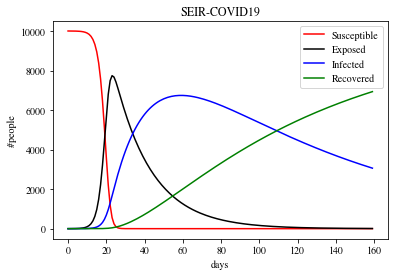

In [8]:
# 首先还是设置一下参数,之后方便修改
N = 10000  # 人口总数
E = []  # 潜伏携带者
E.append(0)

I = []  # 传染者
I.append(1)

S = []  # 易感者
S.append(N - I[0])

R = []  # 康复者
R.append(0)

r = 20  # 传染者接触人数
b = 0.03  # 传染者传染概率
a = 0.05  # 潜伏者患病概率
r2 = 20  # 潜伏者接触人数
b2 = 0.03  # 潜伏者传染概率
y = 0.01  # 康复概率

T = [i for i in range(0, 160)]  # 时间
calc(T)
plot(T,S,E,I,R)

- Beta	The parameter controlling how often a susceptible-infected contact results in a new exposure.  
- Gamma	The rate an infected recovers and moves into the resistant phase.  
- Sigma	The rate at which an exposed person becomes infective.  
- Mu	The natural mortality rate (this is unrelated to disease). This models a population of a constant size   
- Initial susceptible	The number of susceptible individuals at the beginning of the model run.  
- Initial exposed	The number of exposed individuals at the beginning of the model run.  
- Initial infected	The number of infected individuals at the beginning of the model run.  
- Initial recovered	The number of recovered individuals at the beginning of the model run.  
- Days	Controls how long the model will run.  

Parameters within this model are:
1. β, controls the rate of spread, which represents the probability of transmitting disease between a susceptible and an infectious individual [24]. The reproductive number used in this paper is 2.2.  
2. Incubation rate σ, is the rate of latent individuals becoming infectious. Given the known average duration of incubation Y, σ = 1/Y [24]. The average incubation duration of 5.2 days are used here.  
3. Recovery rate γ = 1/D, is determined by the average duration of recovery D, of infection. After this period, they enter the removed phase. The average duration of infection is calculated as the average serial interval minus the average incubation duration. The average serial interval of 7.5 days is used in this paper [24]. 2.3 days of an average infectious duration is used here.   2.3 = 7.5 - 5.2

- α is the inverse of the incubation period (1/t_incubation)
- β is the average contact rate in the population
- γ is the inverse of the mean infectious period (1/t_infectious)
- R0 = β/γ

# model from towards data science

In [9]:
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [10]:
# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 1/5.2
beta = 1.09
gamma = 0.43
params = alpha, beta, gamma
# Run simulation
results = base_seir_model(init_vals, params, t)

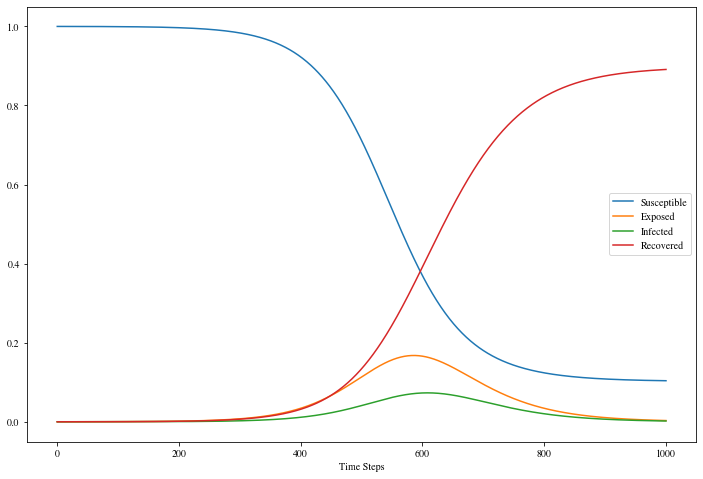

In [11]:
# Plot results
plt.figure(figsize=(12,8))
plt.plot(results)
plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])
plt.xlabel('Time Steps')
plt.show()

# only show Exposed and Infected 

In [12]:
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return E,I

# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
E,I = base_seir_model(init_vals, params, t)
results = np.stack([E,I]).T

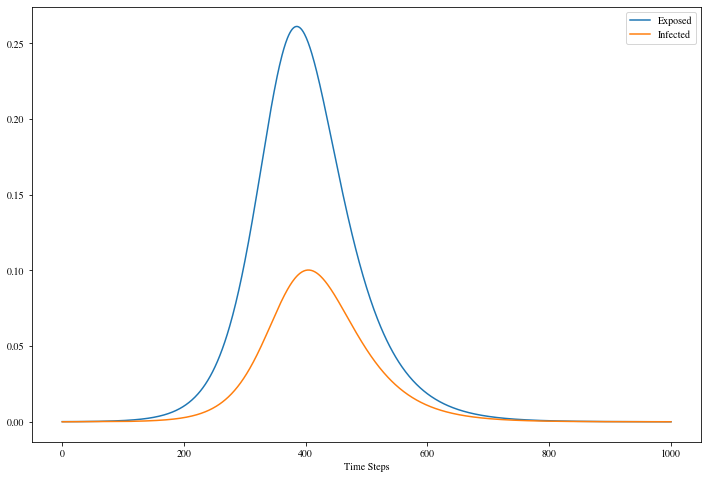

In [13]:
# Plot results
plt.figure(figsize=(12,8))
plt.plot(results)
plt.legend(['Exposed', 'Infected'])
plt.xlabel('Time Steps')
plt.show()

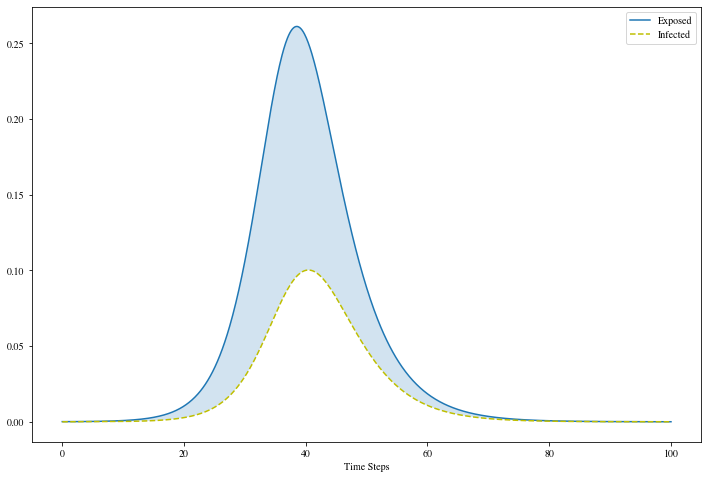

In [14]:
# Plot results
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, E, '-')
ax.plot(t, I, '--',color='y')
ax.fill_between(t,E,I,alpha=0.2)
plt.legend(['Exposed', 'Infected'])
plt.xlabel('Time Steps')
plt.show()

# With social distancing

In [15]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [16]:
# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5

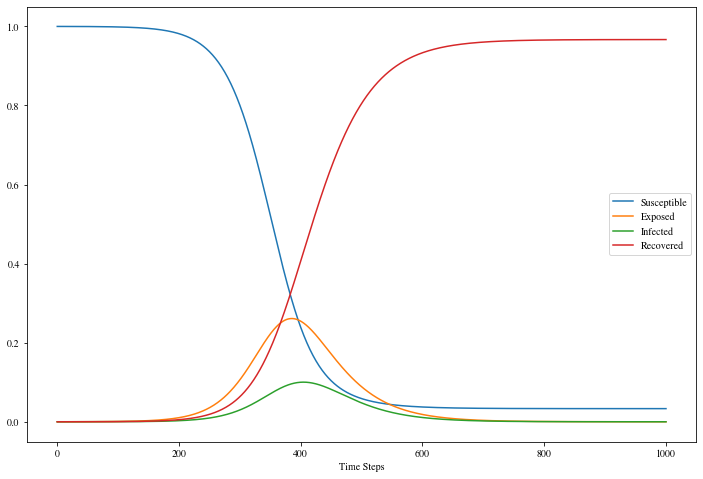

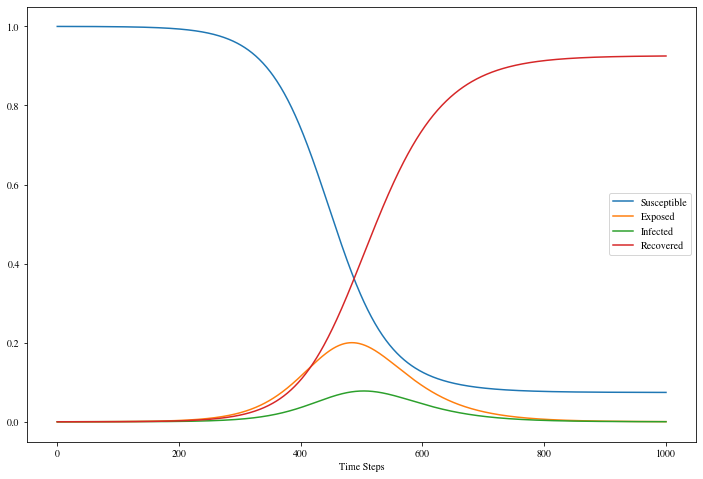

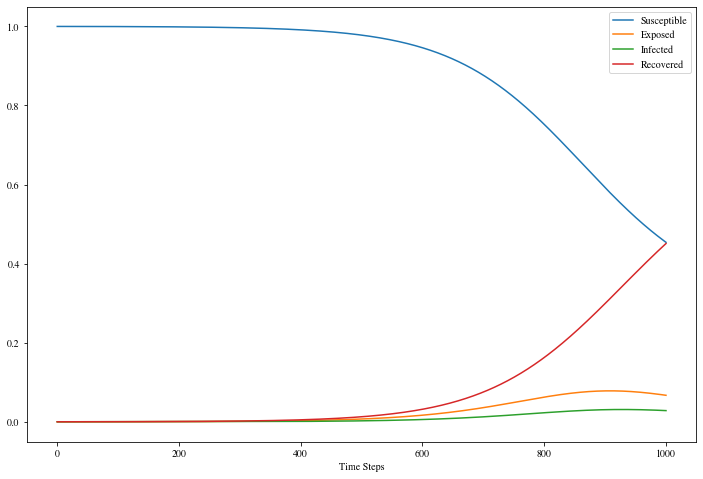

In [17]:
# Run simulation
for rho in [1,0.8,0.5]:
    params = alpha, beta, gamma, rho
    results = seir_model_with_soc_dist(init_vals, params, t)
    # Plot results
    plt.figure(figsize=(12,8))
    plt.plot(results)
    plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])
    plt.xlabel('Time Steps')
    plt.show()

# with social distancing & only show Exposed and Infected 

In [35]:
def seir_model_with_soc_dist(init_vals, params, t, r):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    rho = r
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return E,I

In [36]:
# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 1000000*8.70
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 1/5.2
beta = 2.2
gamma = 0.43
params = alpha, beta, gamma

In [37]:
E_1, I_1 = seir_model_with_soc_dist(init_vals, params, t, 1)
E_2, I_2 = seir_model_with_soc_dist(init_vals, params, t, 0.8)
E_3, I_3 = seir_model_with_soc_dist(init_vals, params, t, 0.5)

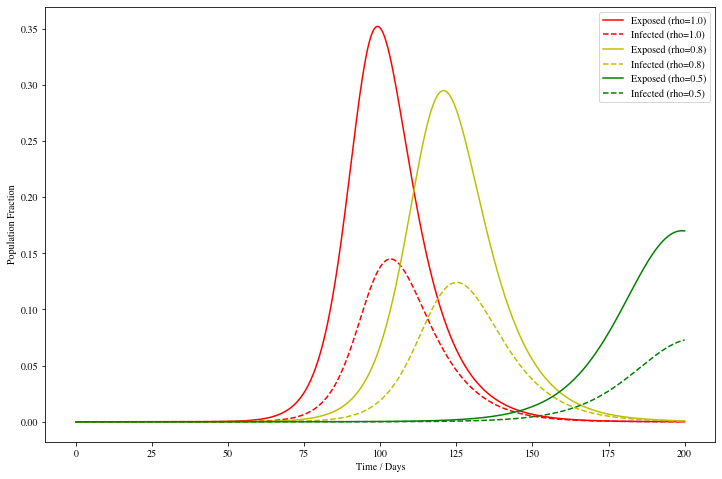

In [38]:
# Plot results
# Plot results
fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(t[:200], E_1[:200], I_1[:200], '-')
#ax.plot(t, E_1, I_1, '-')
ax.plot(t*2, E_1, '-',color='r')
ax.plot(t*2, I_1, '--',color='r')
ax.plot(t*2, E_2, '-',color='y')
ax.plot(t*2, I_2, '--',color='y')
ax.plot(t*2, E_3, '-', color='g')
ax.plot(t*2, I_3, '--',color='g')
# ax.plot(t[:200], E_2[:200], I_2[:200], '--',color='y')
# ax.plot(t[:200], E_3[:200], I_3[:200], '-.',color='g')
plt.legend(['Exposed (rho=1.0)', 'Infected (rho=1.0)','Exposed (rho=0.8)', 'Infected (rho=0.8)','Exposed (rho=0.5)', 'Infected (rho=0.5)'])
plt.xlabel('Time / Days')
plt.ylabel('Population Fraction')
plt.show()

In [39]:
import pandas as pd

In [40]:
E_I = pd.DataFrame([E_1, I_1,E_2, I_2,E_3, I_3])

In [41]:
E_I.to_csv('E_I.csv')